# Central Limit Theorem

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

### Shapiro-Wilk Test: A Simple Explanation

What is it?  
* The Shapiro-Wilk test is a statistical test that helps determine whether a data sample comes from a normally distributed population.

Key Points

Purpose  
- Tests the null hypothesis that a sample x₁, ..., xₙ came from a normally distributed population  
- One of the most powerful tests for checking normality, especially for small sample sizes (n < 50)

How it Works  
1. Orders the sample data from smallest to largest  
2. Calculates a test statistic (W) that measures how closely the data points follow a normal distribution  
3. Compares the test statistic to critical values

The Test Statistic (W)  
* W ranges from 0 to 1  
* W ≈ 1: Data likely follows a normal distribution  
* W ≈ 0: Data likely doesn't follow a normal distribution

Interpretation  
* If p-value > 0.05: Cannot reject normality (data may be normal)  
* If p-value < 0.05: Reject normality (data is not normal)

Advantages  
- Very powerful for small sample sizes  
- Well-established and widely accepted  
- Available in most statistical software packages

Limitations  
- Works best for sample sizes between 3 and 50  
- Less powerful for very large samples  
- Should be used alongside visual inspection (like Q-Q plots)

### Loading the dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Shapiro test on Glocuse cloumn

In [11]:
shapiro_test = stats.shapiro(df['Glucose'])
print("Shapiro-Walk p-value", shapiro_test.pvalue)

if shapiro_test.pvalue < 0.05:
    print("The data likely doesn't follow a normal distribution")
else:
    print("The data may be normally distributed, but the qq-plot can prpovide further insights")


Shapiro-Walk p-value 1.9863474999979633e-11
The data likely doesn't follow a normal distribution


### Generate QQ-Plot for the sampe menans


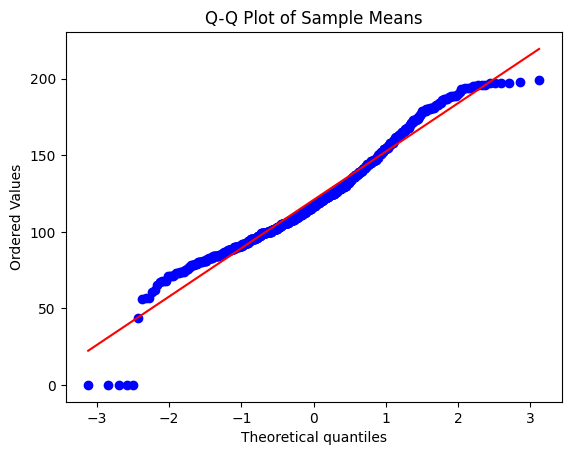

In [12]:
stats.probplot(df['Glucose'], dist='norm',plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()

### Central limit theorem


In [13]:
sample_means = []
n_samples = 100
sample_size = 30

for _ in range(n_samples):
    sample = df['Glucose'].sample(sample_size, replace=True)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

### Plot the distribution of sample means


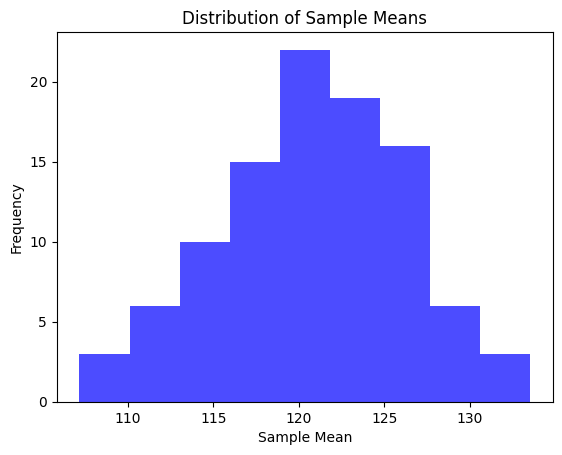

In [14]:
plt.hist(sample_means, bins='auto', alpha=0.7, color='blue')
plt.title("Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

### Generate a Q-Q Plot for the sample means

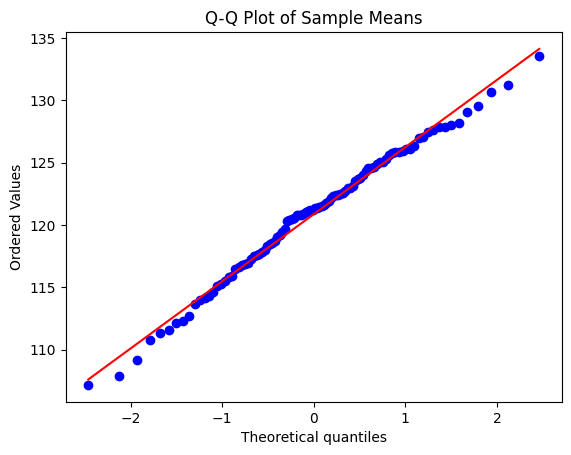

In [15]:

stats.probplot(sample_means, dist='norm', plot=plt)
plt.title("Q-Q Plot of Sample Means")
plt.show()